In [ ]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print('CUDA is not available. Training on CPU.')
else:
  print('CUDA is available. Training on GPU.')

CUDA is available. Training on GPU.


In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='ai_dataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('ai_dataset.zip')

In [ ]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [ ]:
!unzip ai_dataset.zip

Archive:  ai_dataset.zip
   creating: ai_dataset/
   creating: ai_dataset/Validate/
   creating: ai_dataset/Validate/Happy/
  inflating: ai_dataset/Validate/Happy/images (52).jpg  
   creating: __MACOSX/
   creating: __MACOSX/ai_dataset/
   creating: __MACOSX/ai_dataset/Validate/
   creating: __MACOSX/ai_dataset/Validate/Happy/
  inflating: __MACOSX/ai_dataset/Validate/Happy/._images (52).jpg  
  inflating: ai_dataset/Validate/Happy/images (44).jpg  
  inflating: __MACOSX/ai_dataset/Validate/Happy/._images (44).jpg  
  inflating: ai_dataset/Validate/Happy/images (48).jpg  
  inflating: __MACOSX/ai_dataset/Validate/Happy/._images (48).jpg  
  inflating: ai_dataset/Validate/Happy/images (49).jpg  
  inflating: __MACOSX/ai_dataset/Validate/Happy/._images (49).jpg  
  inflating: ai_dataset/Validate/Happy/images (45).jpg  
  inflating: __MACOSX/ai_dataset/Validate/Happy/._images (45).jpg  
  inflating: ai_dataset/Validate/Happy/images (42).jpg  
  inflating: __MACOSX/ai_dataset/Validate/Hap

In [ ]:
import os
from os import listdir, makedirs, getcwd, remove
from os.path import join, exists, expanduser

cache_dir = expanduser(join('~', '.torch'))

if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)

In [ ]:

data_transforms = {
    'train': transforms.Compose([   
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.RandomHorizontalFlip(), 
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  
    ]),
    'val': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'test': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = "ai_dataset"

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, name),
                                          data_transforms[x])
                  for x, name in [['train', "Train"], ['val', "Validate"], ['test', 'Test']]}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes


print(dataloaders)
len(dataloaders['train'])

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7fbd95657f10>, 'val': <torch.utils.data.dataloader.DataLoader object at 0x7fbd95657810>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7fbd95657a50>}


103

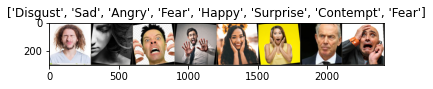

In [ ]:
plt.ion()   

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)


imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import torch.nn as nn
import torchvision.models as models

model_ft = models.inception_v3(pretrained=True)
num_ftrs = model_ft.AuxLogits.fc.in_features
model_ft.AuxLogits.fc = nn.Linear(num_ftrs, 7)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs,7)
input_size = 299

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model_ft.cuda()


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [ ]:
import torch.optim as optim

# specify loss function (cross entropy loss)
criterion = nn.CrossEntropyLoss()

# specify optimizer (Adam optimiser) and learning rate = 0.001
optimizer = optim.Adam(model_ft.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 13

# initialise tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

# create empty lists to store the training and validation losses
train_losses, val_losses = [], []

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_ft.train() # prep model for training
    for data, target in dataloaders['train']:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output, hidden = model_ft(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model_ft.eval() # prep model for evaluation
    for data, target in dataloaders['val']:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_ft(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(dataloaders['train'].sampler)
    valid_loss = valid_loss/len(dataloaders['val'].sampler)

    # store the training and validation losses for later visualisation
    train_losses.append(train_loss)
    val_losses.append(valid_loss)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_ft.state_dict(), 'model.pt') # save in colab
        torch.save(model_ft.state_dict(), 'ai_dataset_.pt') # save in google drive
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.930099 	Validation Loss: 2.311888
Validation loss decreased (inf --> 2.311888).  Saving model ...
Epoch: 2 	Training Loss: 1.840790 	Validation Loss: 2.177337
Validation loss decreased (2.311888 --> 2.177337).  Saving model ...
Epoch: 3 	Training Loss: 1.875936 	Validation Loss: 2.366364
Epoch: 4 	Training Loss: 1.804995 	Validation Loss: 1.718207
Validation loss decreased (2.177337 --> 1.718207).  Saving model ...
Epoch: 5 	Training Loss: 1.750078 	Validation Loss: 2.088474
Epoch: 6 	Training Loss: 1.752207 	Validation Loss: 1.706531
Validation loss decreased (1.718207 --> 1.706531).  Saving model ...
Epoch: 7 	Training Loss: 1.727982 	Validation Loss: 2.206865
Epoch: 8 	Training Loss: 1.700822 	Validation Loss: 1.698320
Validation loss decreased (1.706531 --> 1.698320).  Saving model ...
Epoch: 9 	Training Loss: 1.648340 	Validation Loss: 1.610909
Validation loss decreased (1.698320 --> 1.610909).  Saving model ...
Epoch: 10 	Training Loss: 1.657102 	Valida

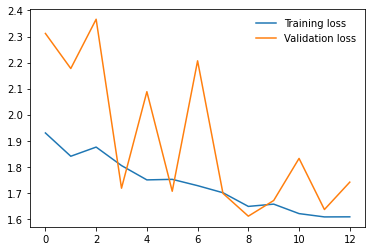

In [ ]:
# visualise the training and validation losses over time
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
# Load the Model with the Lowest Validation Loss
model_ft.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [ ]:
# Test the Trained Network

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model_ft.eval() # prep model for evaluation

for data, target in dataloaders['train']:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model_ft(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(dataloaders['test'].sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(7):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 12.298758

Test Accuracy of     0: 12% (15/122)
Test Accuracy of     1:  0% ( 0/85)
Test Accuracy of     2: 50% (51/101)
Test Accuracy of     3:  4% ( 4/95)
Test Accuracy of     4:  0% ( 0/108)
Test Accuracy of     5: 59% (69/116)
Test Accuracy of     6: 76% (150/196)

Test Accuracy (Overall): 35% (289/823)


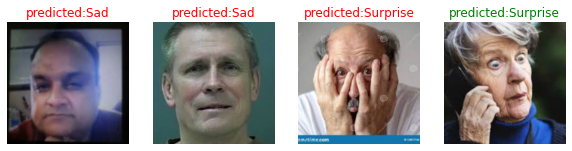

In [ ]:
# Visualize Sample Test Results

# obtain one batch of test images
dataiter = iter(dataloaders['test'])
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model_ft(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the first 4 images in the batch, along with the corresponding labels
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images.cpu()[ii], ax=ax, normalize=True)
    ax.set_title('predicted:{}'.format(class_names[preds[ii]]),
    color=("green" if preds[ii]==labels[ii] else "red"))
